# 03. Revenue Weighted Churn

In [6]:
import pandas as pd

df = pd.read_csv("../data/telco_churn.csv")

In [ ]:
# Prepare churn indicator
df["ChurnFlag"] = (df["Churn"] == "Yes").astype(int)

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnFlag
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


## Segment Customers by Contract Type

In [9]:
summary = (
    df
    .groupby("Contract")
    .agg(
        churn_rate=("ChurnFlag", "mean"),
        avg_monthly_revenue=("MonthlyCharges", "mean"),
        total_monthly_revenue=("MonthlyCharges", "sum")
    )
    .reset_index()
)

summary

,Contract,churn_rate,avg_monthly_revenue,total_monthly_revenue
0,Month-to-month,0.427097,66.398490,257294.15
1,One year,0.112695,65.048608,95816.60
2,Two year,0.028319,60.770413,103005.85


## Compute Revenue-weighted Churn

In [10]:
summary["revenue_at_risk"] = summary["churn_rate"] * summary["total_monthly_revenue"]

summary

,Contract,churn_rate,avg_monthly_revenue,total_monthly_revenue,revenue_at_risk
0,Month-to-month,0.427097,66.398490,257294.15,109889.501484
1,One year,0.112695,65.048608,95816.60,10798.068975
2,Two year,0.028319,60.770413,103005.85,2916.979823


## Visualization

Matplotlib is building the font cache; this may take a moment.


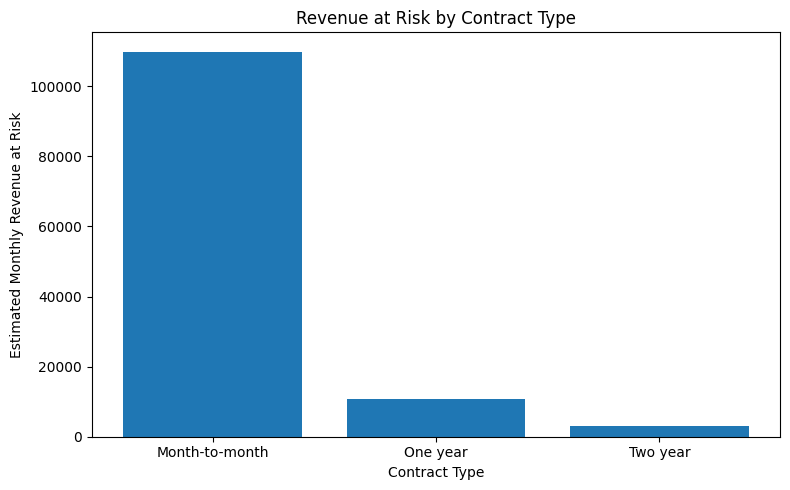

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(summary["Contract"], summary["revenue_at_risk"])
plt.title("Revenue at Risk by Contract Type")
plt.ylabel("Estimated Monthly Revenue at Risk")
plt.xlabel("Contract Type")
plt.tight_layout()

plt.show()

## Key Insight

Month-to-month customers exhibit both the highest churn rate and the highest estimated revenue at risk, accounting for the majority of projected monthly revenue loss.

This indicates that retention efforts targeting this segment are likely to deliver the greatest immediate financial impact.